# 计算机视觉简介

计算机视觉是一门致力于教会计算机”看“的科学，其目的是让计算机理解图片的内容。通过眼睛看世界对于一个视力正常的人来说是一种与生俱来的本能，看图片并理解图片内容对人类来说是易如反掌，但是对于计算机来说，理解图片内容是非常困难的事情。当我们看到下面左边的图片时，我们可以很自然地理解图片的内容是一张桌子上面摆放着插满植物的玻璃瓶和一些书本；但是相同的图片在计算机“眼中”却是以右图中矩阵的形式呈现，这样就很难理解矩阵中哪些部分是杯子哪些部分是书本。长期以来计算机视觉领域都在致力于研究让计算机理解矩阵形式的图片中的内容，包括矩阵中存在什么，其大小、位置、形状等特征。



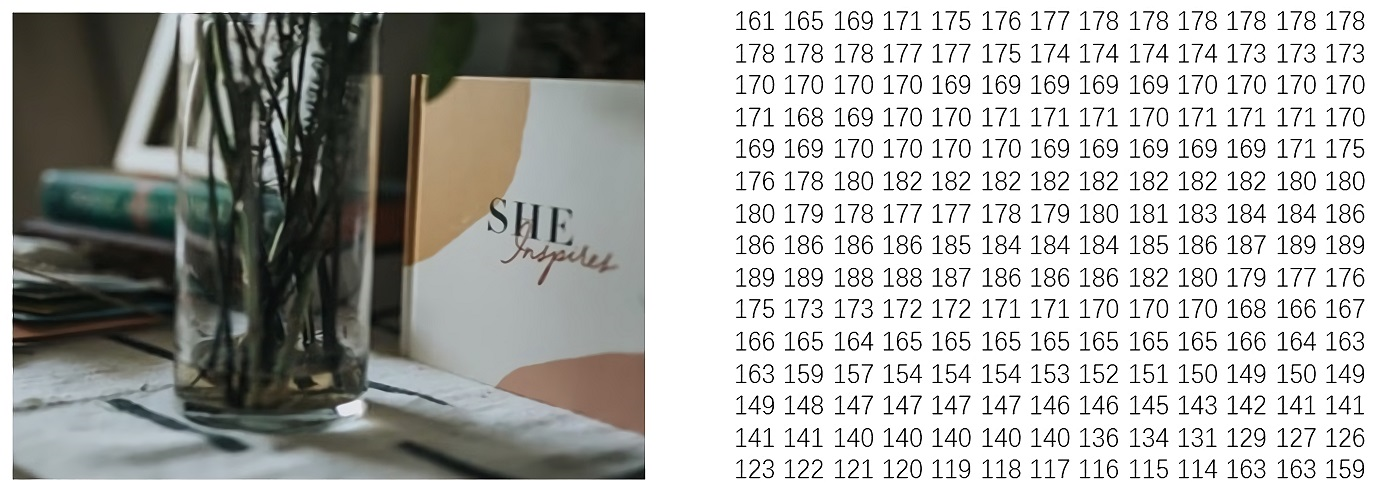

计算机视觉在生产生活中已经得到广泛地应用，例如广泛应用于机场和车站的人脸识别系统、手机相机的美颜功能、停车场的车牌识别、无人驾驶、AR 和 VR、药品研发、医疗影像检测等。经过 40 多年发展，计算机视觉领域已经细分出多个热门研究方向：物体检测、运动跟踪、语义分割、视觉问答、姿势体态识别等。计算机视觉的发展经历了从偏重计算和数学方法、90 年代传统的人工设计特征结合机器学习的分类器、到 2012 年以后以深度学习为主的视觉研发方法，计算机视觉正在以井喷式地发展趋势应用于我们的生活。

在后面的章节将循序渐进地带着大家入门计算机视觉，在课程的最后我们将通过实例让大家对所学过的方法进行一个回顾，并且课程不会涉及过多的传统视觉算法，例如 FAST、SIFT、SURF、Harris 等算法，因为深度学习的快速发展及其在视觉领域出色的表现，现在很难看到相关的传统算法的论文发表，传统算法逐渐退出了视觉领域的舞台。本课程介绍的内容是视觉领域中常常用到的基本图像处理方法，这些方法在图像预处理和对数据集进行处理时会经常用到，例如想要获得理想的深度学习模型，对数据集适当地处理就是重要的一环，所以掌握这些基本方法有助于在视觉项目中获得较好的结果。

# OpenCV 和相关的工具

在进行图像相关的代码编写前，让我们先简单介绍一下各个软件包的作用：

OpenCV 是一个基于 C++ 编写的轻量级、高效的、开源的跨平台计算机视觉库，可运行在多种操作系统上：Windows、Mac OS、Linux、Android。由于其具有友好的可读性和较高的运行效率，故获得大量开发者的青睐，同时其还提供 Python、Ruby 等语言的接口方便开发者调用。本教程将使用 Python 语言对 OpenCV 的库函数进行调用。

NumPy 是一个支持处理多维度大型矩阵的 Python 科学计算包。在对图像进行处理时经常会用到 NumPy，OpenCV 中读取存储图片都是以 NumPy 形式完成的。利用 NumPy 我们可以轻松地以多维数据的形式呈现图片，并对图片进行重组、计算、数值分析等操作。想要深入的学习可以访问 NumPy 官方文档。

Matplotlib 是一个 Python 2D 绘图库。其可以方便地生成直方图、条形图、散点图等。

# 图像的基础知识

**像素**

每一张图片都是由一组像素构成的，像素是构成图片的最小单位。可以把一张图片看成是由许多小方格组成，那么每一个小方格就是像素。如果我们有一张宽为 100 高为 100 的图片，那么这个图片共有 100*100 = 10000 个像素。如下图，其中右边的图片中每一个方格代表一个像素。

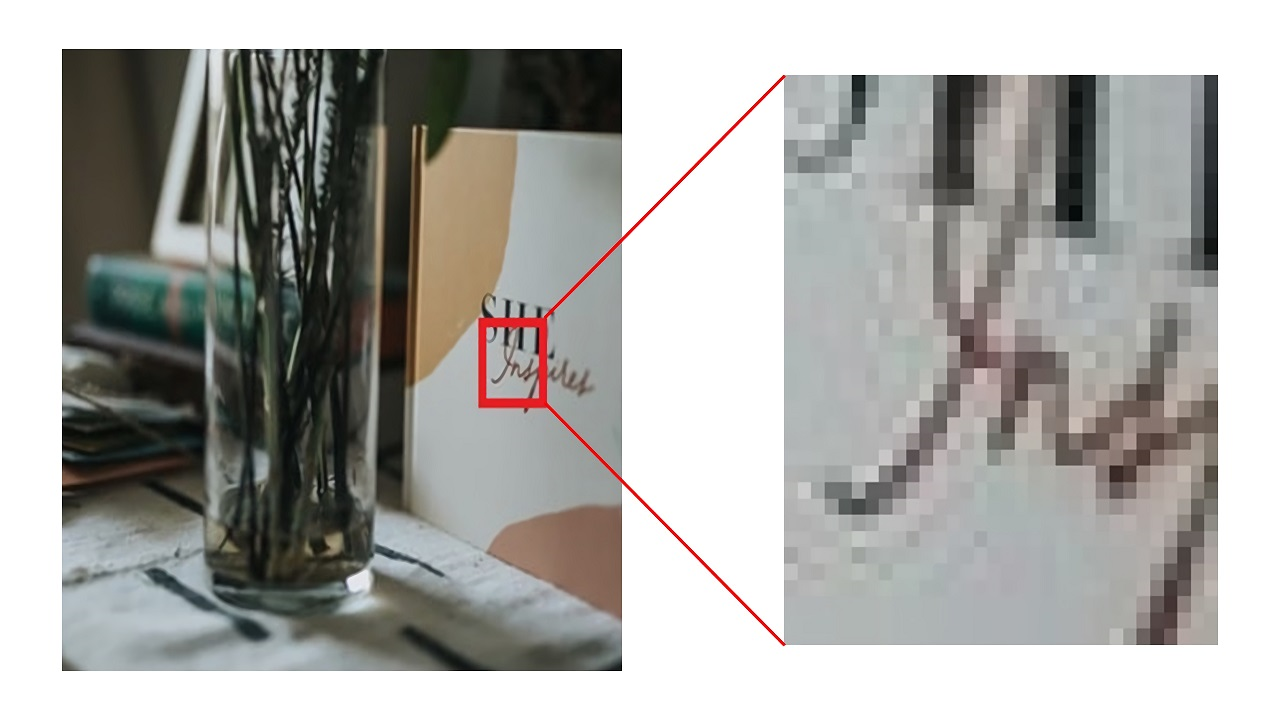

大部分像素有 2 种表示形态：灰度和彩色。在灰度图像中，每一个像素都具有一个在 0 到 255 之间的值，这些不同的值称为像素值，也可称为像素的强度。其中 0 表示黑色而 255 表示白色，不同的灰度表示不同的明暗变化，越接近 0 的值在图像上表现的越暗，越接近 255 的值在图像上表现的越明亮。

彩色像素通常用 RGB 颜色空间表示，RGB 颜色空间以 红（Red）、绿（Green）、蓝（Blue）三种基本颜色为基础，进行不同程度的叠加从而产生丰富的颜色，也通常称为三通道图片。这三种颜色每一个都用一个 0 到 255 的值表示，通常使用 8 位无符号整数来表示这些颜色的强度。所以一个彩色像素值表示为 (red, green, blue)。例如红色可以表示为 (255, 0, 0)，白色表示为 (255, 255, 255)。

**像素坐标**


像素坐标用于表示一个像素所处在图片中的位置，我们用 (y, x) 来表示一个像素在图片中的位置，其中 y 表示行，x 表示列。下图是一张数字 4 的图片，图中每个方格代表一个像素点，这是一张宽为 10 高为 10 的图片，所以这里总共有 10*10 = 100 个像素，我们定义图中左上角顶点的位置为起始点，表示为 (0, 0)。因为第一个位置我们用 0 表示，所以第一行的第 6 个像素表示为 (0, 5)。同样的 (7, 5) 表示像素在第 8 行第 6 列。知道了像素的位置后，我们就可以对指定像素进行相关的操作了。在这里需要注意的是我们设置的起始位置是 0 而不是 1，记住这一点可以在后面对像素的操作中避免很多问题。

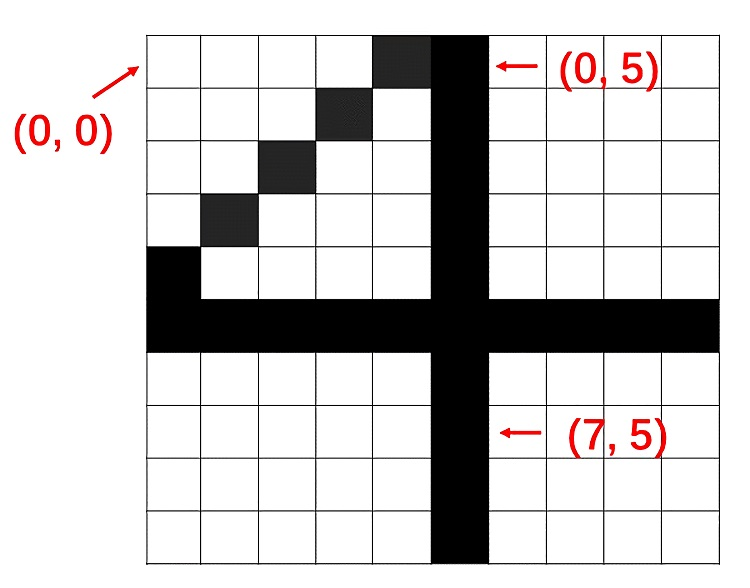

# 图像的基本操作

In [ ]:
# 输入终端中
# wget https://labfile.oss-internal.aliyuncs.com/courses/2480/images.zip

In [2]:
import cv2
image = cv2.imread("images/cup.jpg")

我们可以使用 type(image) 来看一下这个 image 的数据类型，如下图我们可以看到这个函数它返回一个 NumPy 数组用于表示图片。

我们使用 cv2.imwrite 保存图片，第一个参数 “new.jpg" 是我们要保存图片的地址，第二个参数 iamge 是我们要保存的图片。执行这条语句会输出一个 True，说明我们成功保存了图片。至此我们已经完成了图片的载入、显示、保存操作

In [3]:
cv2.imwrite("new.jpg", image)

True

# 修改像素值

现在我们已经学会读取、显示、保存图片了，下面的例子中我们将对图片进行一些简单的操作。我们在 /home/project 目录下创建一个名为 args.py 的 Python 文件，在该文件中编写如下代码。

In [ ]:
import cv2
import argparse

ap = argparse.ArgumentParser()
ap.add_argument("--image", type = str, help = "image path")
args = ap.parse_args()

image = cv2.imread(args.image)

我们在 args.py 导入了一个新的模块 argparse，这个库用于帮我们解析命令行，让我们可以直接在命令行中向程序传入参数并让程序运行，之前我们使用 cv2.imread 读取图片时是将图片路径作为参数传入该函数，这样如果我们每次传入不同的图片路径就需要不断的更改传入函数的参数，使用 argparse 可以不用修改函数代码，直接将图片的路径作为命令传入函数。

argparse.ArgumentParser 创建一个 ap 对象。使用 add_argument 函数添加命令行参数，这里我们只需要一个 --image 的参数，这个参数是我们要读取的图片路径。最后我们将会解析命令，然后将他们存储起来。

我们使用 args.image 将解析的图片路径传入 cv2.imread 函数中。

在终端中运行下面这条命令后，图片将被 cv2.imread 函数读取。

In [5]:
# %run args.py --image images/cup.jpg

我们使用 type(image) 函数来测试下图片是否被读取，可以看到图片是以 NumPy 数组形式输出的。

接下来将学习获取像素值并对其进行修改。图片在计算机中是由许多数字组成的矩阵，要想获得指定的像素值，只需要提供该像素值在矩阵中的 (y, x) 坐标。下面的代码我们提供的坐标值为 (0, 0) 即图片的左上角顶点的坐标，然后获取其对应的 (b, g, r) 值。

In [ ]:
(b, g, r) = image[0, 0]

这里需要注意的是通常我们认为的通道顺序是 Red，Green，Blue，但是 OpenCV 是按照相反的顺序存储的，即 Blue，Green，Red 顺序。下面我们将每个通道的像素值输出看一下。

In [6]:
# print("coordinate (0, 0): Red = {:d}, Green = {:d}, Blue = {:d}".format(r, g, b))

使用下面的代码修改像素值，这里直接将坐标 (0, 0) 的值赋值为 (0, 0, 255)，这个元组表示红色。因为上面我们提到 OpenCV 中 RGB 存储的顺序是反的，所以红色是 255，绿色是 0，蓝色是 0。

In [7]:
image[0, 0] = (0, 0, 255)

修改像素值很简单，下面代码先获取 (0, 0) 坐标的各个通道的值，然后使用 print 函数将值在终端中打印出来。

In [8]:
(b, g, r) = image[0, 0]
print("coordinate (0, 0): Red = {:d}, Green = {:d}, Blue = {:d}".format(r, g, b))

coordinate (0, 0): Red = 255, Green = 0, Blue = 0


从输出可以看到坐标为 (0, 0) 的像素值已经被修改了。

现在我们已经学会了修改单个像素值，并且我们可以使用切片的方法获取并修改图片中指定的一块区域的像素值。下面的代码表示从图片的左上角顶点开始取一块 150*300 像素的区域。这里我们需要提供 4 个整数：要截取图片的起始位置、图片的高和宽。我们从图片的左上角顶点开始，所以 (0, 0) 是起始位置。我们提供的截取图片的高是 150 宽是 300，所以 0:150 和 0:300 分别表示从起始点开始获取 150 行和 300 列像素值，然后使用 cv2.imwrite 保存获取到的部分图片，最后输出的 True 说明已经保存了图片

In [10]:
# block = image[0:150, 0:300]
# cv2.imwrite("Block.jpg", block)

上面的代码会在当前目录下保存名为 Block.jpg 的图片，下面是截取图片的部分区域的结果。



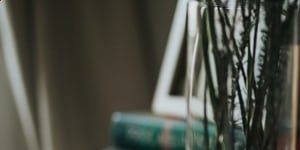

同样上面代码会在当前目录下保存名为 Red_block.jpg 图片，从下图可以看到我们已经修改了图片中的部分区域的像素值。

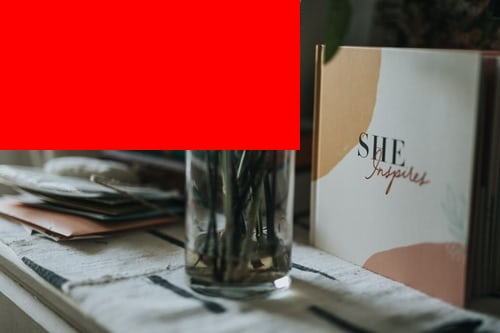

# 拆分和合并图像通道


上一节中我们学习了获得彩色像素值的方法，这一节我们会学习将一张 RGB 彩色图片的三个通道拆分为单通道。在实际应用中有时候我们需要分别处理图像的 R，G，B 通道，这种情况下我们可以使用 cv2.split 函数来实现这个功能。首先通过下面的命令运行已经在前面的实验编辑过的 args.py 文件。

In [16]:
%run args.py --image images/cup.jpg

然后使用 cv2.split 函数将三通道图片分别拆分为三个单独通道，这个函数只有一个参数，image 是我们要输入函数的图片，然后函数会按照 (b, g, r) 的顺序输出每个通道。

In [17]:
(b, g, r) = cv2.split(image)

下面代码使用三次 cv2.imwrite 函数分别将 r、g、b 保存为三张单通道图片。

In [18]:
cv2.imwrite("Red.jpg", r)
cv2.imwrite("Green.jpg", g)
cv2.imwrite("Blue.jpg", b)

True

下图为保存的结果，三张不同通道的图片区别不是很大，但是我们还是可以看出一些细微的差别。在原图中杯子旁边的书本上的两个扇形呈现棕黄色，在蓝色通道中其呈现的强度相较于绿色和红色通道中同样的位置更暗，表明这些区域中很少有蓝色。在绿色通道中这些区域显得更明亮些，说明其中包含的绿色比蓝色通道的同一区域更多。最后红色通道中这个区域最亮，表明这个区域中包含的红色比其他两个通道的都多。

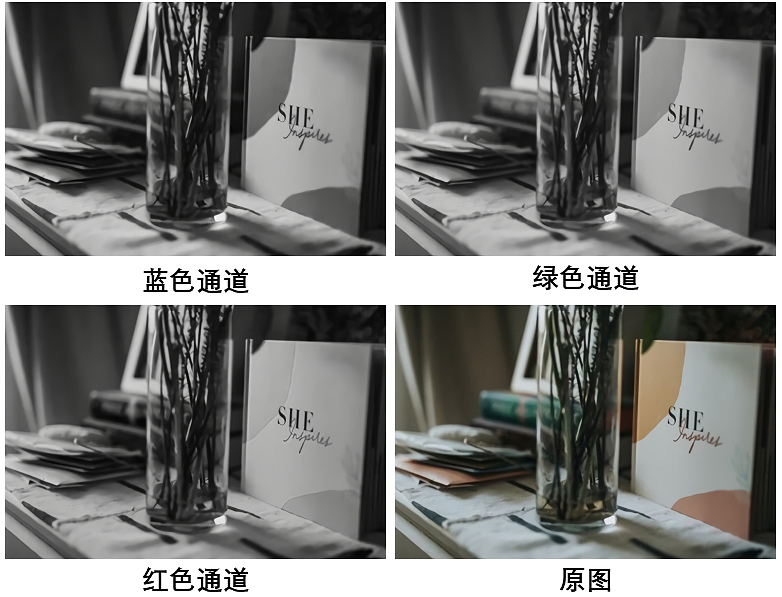

我们可以使用 cv2.merged 函数将分开的通道合并，只需要按照 BGR 的顺序将列表 [b, g, r] 传入函数，这样函数会将三个单独通道合并为一张三通道图片，合并后的图片和原图是一样的。

In [19]:
sum = cv2.merge([b,g,r])
cv2.imwrite('sum.jpg',sum)

True

# 

# 访问图像属性

一张图像具有多个属性：行数、列数、通道数、图像数据类型、像素数等。这一节我们将通过几个简单的函数来一一访问这些属性。首先通过下面的命令运行已经在前面的实验编辑过的 args.py 文件。

In [21]:
%run args.py --image images/cup.jpg

In [22]:
# 我们可以通过 shape 方法获取图片的一些属性，
# 在 IPython 中输入下面代码将会获得图片的宽、高以及通道数
image.shape

(333, 500, 3)

可以看到 image.shape 返回的是一组包含图片属性的元组。第一个元素 333 是图片的高，表示图片有多少行像素。第二个元素 500 是图片的宽，表示图片有多少列像素。最后一个元素 3 是图片的通道数，我们使用的是 RGB 彩色图片，所以一共有三个通道。

我们使用不同的下标索引来访问各个元素。使用 image.shape[0] 获取图片的高，使用 image.shape[1] 获取图片的宽，使用 image.shape[2] 获取图片的通道数。

接下来我们通过两行简单的代码来获得图片的像素值总数和图像的数据类型，我们使用 image.size 获取图片的像素值的个数，这个值是 333*500*3 的结果。

使用 image.dtype 获取像素值的数据类型，可以看到像素值的数据类型是 uint8 表示 8 位无符号整数。因为像素值的范围是 0 到 255，而 uint8 也是在这一范围。

知道图片的数据类型可以帮助我们在调试时避免很多问题，因为 OpenCV-Python 代码的大量错误是由无效的数据类型导致的。